In [232]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

file = 'prices1.csv'


In [233]:

data = pd.read_csv(file, index_col='Transaction_time')
data = data.drop('Unnamed: 0', axis=1)
data.index = pd.to_datetime(data.index)

data.columns= ['gem_p', 'mf', 'delta', 'tr_f','wf','pd','gdax_p']
cols = data.columns.tolist()
cols = cols[-1:] + cols[:-1]
data=data[cols]

print(data.info())


               

FileNotFoundError: File b'prices1.csv' does not exist

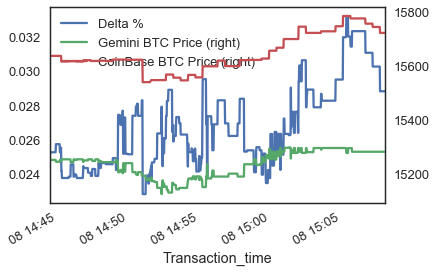

In [234]:
#Simple Line Plot
data.pd.plot(label="Delta %", legend=True)
data.gem_p.plot(secondary_y= True, label = 'Gemini BTC Price', legend = True)
data.gdax_p.plot(secondary_y= True,label= "CoinBase BTC Price", legend=True)
plt.show()

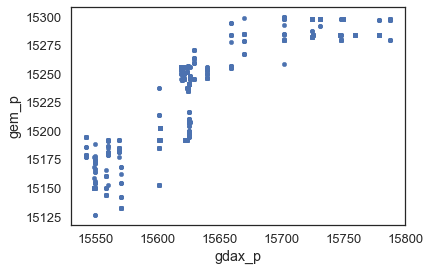

In [235]:
#Scatter Plot
data.plot(kind='scatter', x ='gdax_p', y= 'gem_p')
plt.show()

In [236]:
#Save price data in two separate arrays

num1=data['gem_p']
num2 =data['gdax_p']
num2.head()

Transaction_time
2017-12-08 14:44:30.804222    15639.99
2017-12-08 14:44:31.991772    15639.99
2017-12-08 14:44:33.148005    15639.99
2017-12-08 14:44:34.304411    15639.99
2017-12-08 14:44:35.507411    15639.99
Name: gdax_p, dtype: float64

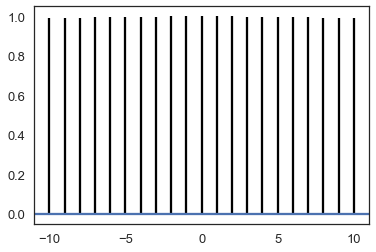

In [237]:
#Cross-correlation analysis with lagged 

x_cor=plt.xcorr(num2,num1, normed=True, usevlines=True, maxlags=10)
plt.show()